In [ ]:
!pip install yfinance   #to collect finance data from yahoo
!pip install ta         #Technical Analysis library to financial time series datasets

In [2]:
import yfinance as yf
import ta
import pandas as pd
from datetime import date, timedelta, datetime
from IPython.display import clear_output

The Assigment is about the analysis of various trading strategies on the META security from January 2019 to October 2022.

Outline of Assignment:

*   Loading dataset
*   Implementing the trading strategies: 

    1.   K-Band Strategy
    2.   Bollinger Band
    3.   Moving Average
    4.   MACD
    5.   RSI
    6.   WR
    7.   Stochastic Fast
    8.   Stochastic Slow
    9.   Ichimoku

*   Testing of implemented strategies on the financial data.
*   One Integrated function to find out the best strategy to trade with for a particular securities.





In [3]:
ticker = 'META'
start_date = '2019-01-01'
end_date = '2022-11-01'

date_fmt = '%Y-%m-%d'

In [4]:
def get_stock_backtest_data(ticker, start_date, end_date):
  date_fmt = '%Y-%m-%d'

  start_date_buffer = datetime.strptime(start_date, date_fmt) - timedelta(days=365*6)
  start_date_buffer = start_date_buffer.strftime(date_fmt)

  df = yf.download(ticker, start=start_date_buffer, end=end_date)

  return df

In [89]:
df = get_stock_backtest_data('META', '2019-01-01', '2022-11-01')
df.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,27.440001,28.180000,27.420000,28.000000,28.000000,69846400
2013-01-03,27.879999,28.469999,27.590000,27.770000,27.770000,63140600
2013-01-04,28.010000,28.930000,27.830000,28.760000,28.760000,72715400
2013-01-07,28.690001,29.790001,28.650000,29.420000,29.420000,83781800
2013-01-08,29.510000,29.600000,28.860001,29.059999,29.059999,45871300


In [6]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-25,130.880005,138.350006,130.589996,137.509995,137.509995,38433200
2022-10-26,131.679993,135.550003,128.529999,129.820007,129.820007,82791500
2022-10-27,97.980003,102.500000,96.379997,97.940002,97.940002,232316600
2022-10-28,99.580002,100.849998,97.510002,99.199997,99.199997,95928300
2022-10-31,98.220001,99.320000,92.599998,93.160004,93.160004,121361400


Since we get the trading data of META from 2013 to 2022, Let's start to build the stategies.

In [7]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

# 1. K-Band Strategy

In [8]:
def strategy_KeltnerChannel_origin(df, **kwargs):
  n = kwargs.get('n', 10)
  data = df.copy()

  k_band = ta.volatility.KeltnerChannel(data.High, data.Low, data.Close, n)

  data['K_BAND_UB'] = k_band.keltner_channel_hband().round(4)
  data['K_BAND_LB'] = k_band.keltner_channel_lband().round(4)

  data['CLOSE_PREV'] = data.Close.shift(1)
  
  data['LONG'] = (data.Close <= data.K_BAND_LB) & (data.CLOSE_PREV > data.K_BAND_LB)
  data['EXIT_LONG'] = (data.Close >= data.K_BAND_UB) & (data.CLOSE_PREV < data.K_BAND_UB)

  data['SHORT'] = (data.Close >= data.K_BAND_UB) & (data.CLOSE_PREV < data.K_BAND_UB)
  data['EXIT_SHORT'] = (data.Close <= data.K_BAND_LB) & (data.CLOSE_PREV > data.K_BAND_LB)

  data.LONG = data.LONG.shift(1)
  data.EXIT_LONG = data.EXIT_LONG.shift(1)
  data.SHORT = data.SHORT.shift(1)
  data.EXIT_SHORT = data.EXIT_SHORT.shift(1)

  return data

In [9]:
df1 = df.copy(deep=True)

In [10]:
df1 = strategy_KeltnerChannel_origin(df1, n=10)
#df1.head(10).dropna()
print(df1.describe(include = 'all'))

               Open         High          Low        Close    Adj Close  \
count   2476.000000  2476.000000  2476.000000  2476.000000  2476.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean     156.289079   158.243639   154.330238   156.319257   156.319257   
std       84.387155    85.467630    83.341617    84.410338    84.410338   
min       22.990000    23.090000    22.670000    22.900000    22.900000   
25%       84.074999    84.967501    83.212502    83.755003    83.755003   
50%      153.325005   154.790001   151.305000   153.130005   153.130005   
75%      195.195004   198.517498   193.019997   195.842499   195.842499   
max      381.679993   384.329987   378.809998   382.179993   382.179993   

              Volume    K_BAND_UB    K_BAND_LB   CLOSE_PREV   LONG EXIT_LONG  \
count   2.476000e+0

In [11]:
import matplotlib.pyplot as plt
import numpy as np

In [12]:
data1 = pd.DataFrame(df1, columns=["K_BAND_UB", "K_BAND_LB","Adj Close"])
data1

,K_BAND_UB,K_BAND_LB,Adj Close
Date,,,
2013-01-02,28.6267,27.1067,28.000000
2013-01-03,28.7250,27.0850,27.770000
2013-01-04,29.0189,27.1922,28.760000
2013-01-07,29.3708,27.4308,29.420000
2013-01-08,29.4793,27.6313,29.059999
...,...,...,...
2022-10-25,137.1723,125.1843,137.509995
2022-10-26,137.8817,125.1737,129.820007
2022-10-27,134.7280,122.5180,97.940002


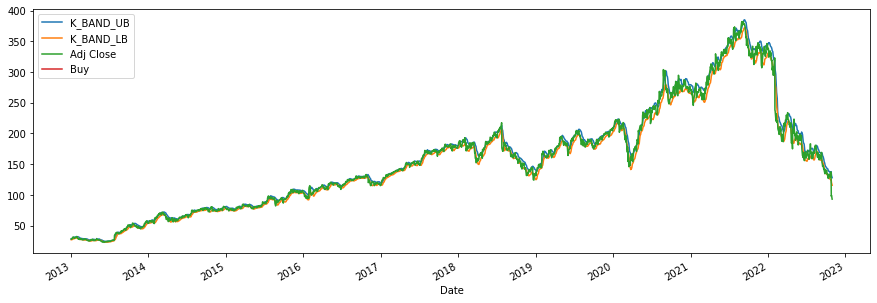

In [13]:
Buy = df1[(df1['LONG'] == True) & (df1['EXIT_SHORT'] == True)]
data = pd.DataFrame(df1, columns=["K_BAND_UB", "K_BAND_LB","Adj Close","Buy"])
data.plot(figsize=(15,5))

# Bollinger Band

In [14]:
def strategy_BollingerBands(df, **kwargs):
  n = kwargs.get('n', 20)
  n_rng = kwargs.get('n_rng', 2)
  data = df.copy()

  boll = ta.volatility.BollingerBands(data.Close, n, n_rng)

  data['BOLL_LBAND_INDI'] = boll.bollinger_lband_indicator()
  data['BOLL_UBAND_INDI'] = boll.bollinger_hband_indicator()
  data['BOLL_UBAND'] = boll.bollinger_hband()
  data['BOLL_LBAND'] = boll.bollinger_lband()
  data['BOLL_pBAND'] = boll.bollinger_pband()

  data['CLOSE_PREV'] = data.Close.shift(1)

  data['LONG'] = data.BOLL_LBAND_INDI == 1
  data['EXIT_LONG'] = data.BOLL_UBAND_INDI == 1

  data['SHORT'] = data.BOLL_UBAND_INDI == 1
  data['EXIT_SHORT'] = data.BOLL_LBAND_INDI == 1

  data.LONG = data.LONG.shift(1)
  data.EXIT_LONG = data.EXIT_LONG.shift(1)
  data.SHORT = data.SHORT.shift(1)
  data.EXIT_SHORT = data.EXIT_SHORT.shift(1)

  return data


def strategy_BollingerBands_long(df, **kwargs):
  n = kwargs.get('n', 20)
  n_rng = kwargs.get('n_rng', 2)
  data = df.copy()
  
  boll = ta.volatility.BollingerBands(data.Close, n, n_rng)

  data['BOLL_LBAND_INDI'] = boll.bollinger_lband_indicator()
  data['BOLL_UBAND_INDI'] = boll.bollinger_hband_indicator()
  data['BOLL_UBAND'] = boll.bollinger_hband()
  data['BOLL_LBAND'] = boll.bollinger_lband()
  data['BOLL_pBAND'] = boll.bollinger_pband()

  data['CLOSE_PREV'] = data.Close.shift(1)

  data['LONG'] = data.BOLL_LBAND_INDI == 1
  data['EXIT_LONG'] = data.BOLL_UBAND_INDI == 1

  data['SHORT'] = False
  data['EXIT_SHORT'] = False

  data.LONG = data.LONG.shift(1)
  data.EXIT_LONG = data.EXIT_LONG.shift(1)

  data.SHORT = data.SHORT.shift(1)
  data.EXIT_SHORT = data.EXIT_SHORT.shift(1)

  return data

In [15]:
df2 = df.copy(deep=True)
df2 = strategy_BollingerBands(df2, n=20, n_rng= 2)
#df2 = strategy_BollingerBands_long(df, n=20, n_rng= 2)
print(df2.describe(include = 'all'))
#print(df2.describe(include = 'all'))

               Open         High          Low        Close    Adj Close  \
count   2476.000000  2476.000000  2476.000000  2476.000000  2476.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean     156.289079   158.243639   154.330238   156.319257   156.319257   
std       84.387155    85.467630    83.341617    84.410338    84.410338   
min       22.990000    23.090000    22.670000    22.900000    22.900000   
25%       84.074999    84.967501    83.212502    83.755003    83.755003   
50%      153.325005   154.790001   151.305000   153.130005   153.130005   
75%      195.195004   198.517498   193.019997   195.842499   195.842499   
max      381.679993   384.329987   378.809998   382.179993   382.179993   

              Volume  BOLL_LBAND_INDI  BOLL_UBAND_INDI   BOLL_UBAND  \
count   2.476000e+03      24

# Moving Avarage - EMA

In [16]:
def strategy_MA(df, **kwargs):
  n = kwargs.get('n', 50)
  ma_type = kwargs.get('ma_type', 'sma')
  ma_type = ma_type.strip().lower()
  data = df.copy()
  
  if ma_type == 'sma':
    sma = ta.trend.SMAIndicator(data.Close, n)
    data['MA'] = sma.sma_indicator().round(4)
  elif ma_type == 'ema':
    ema = ta.trend.EMAIndicator(data.Close, n)
    data['MA'] = ema.ema_indicator().round(4)

  data['CLOSE_PREV'] = data.Close.shift(1)

  data['LONG'] = (data.Close > data.MA) & (data.CLOSE_PREV <= data.MA)
  data['EXIT_LONG'] = (data.Close < data.MA) & (data.CLOSE_PREV >= data.MA)

  data['SHORT'] = (data.Close < data.MA) & (data.CLOSE_PREV >= data.MA)
  data['EXIT_SHORT'] = (data.Close > data.MA) & (data.CLOSE_PREV <= data.MA)

  data.LONG = data.LONG.shift(1)
  data.EXIT_LONG = data.EXIT_LONG.shift(1)
  data.SHORT = data.SHORT.shift(1)
  data.EXIT_SHORT = data.EXIT_SHORT.shift(1)

  return data

In [17]:
df3= df.copy(deep=True)

In [18]:
df3 = strategy_MA(df3, n=50, ma_type = 'ema')
print(df3.describe(include = 'all'))

               Open         High          Low        Close    Adj Close  \
count   2476.000000  2476.000000  2476.000000  2476.000000  2476.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean     156.289079   158.243639   154.330238   156.319257   156.319257   
std       84.387155    85.467630    83.341617    84.410338    84.410338   
min       22.990000    23.090000    22.670000    22.900000    22.900000   
25%       84.074999    84.967501    83.212502    83.755003    83.755003   
50%      153.325005   154.790001   151.305000   153.130005   153.130005   
75%      195.195004   198.517498   193.019997   195.842499   195.842499   
max      381.679993   384.329987   378.809998   382.179993   382.179993   

              Volume           MA   CLOSE_PREV   LONG EXIT_LONG  SHORT  \
count   2.476000e+03  242

# Moving Avarage - SMA

In [ ]:
def strategy_MA(df, **kwargs):
  n = kwargs.get('n', 50)
  ma_type = kwargs.get('ma_type', 'sma')
  ma_type = ma_type.strip().lower()
  data = df.copy()
  
  if ma_type == 'sma':
    sma = ta.trend.SMAIndicator(data.Close, n)
    data['MA'] = sma.sma_indicator().round(4)
  elif ma_type == 'ema':
    ema = ta.trend.EMAIndicator(data.Close, n)
    data['MA'] = ema.ema_indicator().round(4)

  data['CLOSE_PREV'] = data.Close.shift(1)

  data['LONG'] = (data.Close > data.MA) & (data.CLOSE_PREV <= data.MA)
  data['EXIT_LONG'] = (data.Close < data.MA) & (data.CLOSE_PREV >= data.MA)

  data['SHORT'] = (data.Close < data.MA) & (data.CLOSE_PREV >= data.MA)
  data['EXIT_SHORT'] = (data.Close > data.MA) & (data.CLOSE_PREV <= data.MA)

  data.LONG = data.LONG.shift(1)
  data.EXIT_LONG = data.EXIT_LONG.shift(1)
  data.SHORT = data.SHORT.shift(1)
  data.EXIT_SHORT = data.EXIT_SHORT.shift(1)

  return data

In [ ]:
df3= df.copy(deep=True)

In [ ]:
df3 = strategy_MA(df3, n=50, ma_type = 'sma')
print(df3.describe(include = 'all'))

               Open         High          Low        Close    Adj Close  \
count   2476.000000  2476.000000  2476.000000  2476.000000  2476.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean     156.289079   158.243639   154.330238   156.319257   156.319257   
std       84.387155    85.467630    83.341617    84.410338    84.410338   
min       22.990000    23.090000    22.670000    22.900000    22.900000   
25%       84.074999    84.967501    83.212502    83.755003    83.755003   
50%      153.325005   154.790001   151.305000   153.130005   153.130005   
75%      195.195004   198.517498   193.019997   195.842499   195.842499   
max      381.679993   384.329987   378.809998   382.179993   382.179993   

              Volume           MA   CLOSE_PREV   LONG EXIT_LONG  SHORT  \
count   2.476000e+03  242

#MACD

In [19]:
def strategy_MACD(df, **kwargs):
  n_slow = kwargs.get('n_slow', 26)
  n_fast = kwargs.get('n_fast', 12)
  n_sign = kwargs.get('n_sign', 9)
  data = df.copy()

  macd = ta.trend.MACD(data.Close, n_slow, n_fast, n_sign)

  data['MACD_DIFF'] = macd.macd_diff().round(4)
  data['MACD_DIFF_PREV'] = data.MACD_DIFF.shift(1)

  data['LONG'] = (data.MACD_DIFF > 0) & (data.MACD_DIFF_PREV <= 0)
  data['EXIT_LONG'] = (data.MACD_DIFF < 0) & (data.MACD_DIFF_PREV >= 0)

  data['SHORT'] = (data.MACD_DIFF < 0) & (data.MACD_DIFF_PREV >= 0)
  data['EXIT_SHORT'] = (data.MACD_DIFF > 0) & (data.MACD_DIFF_PREV <= 0)

  data.LONG = data.LONG.shift(1)
  data.EXIT_LONG = data.EXIT_LONG.shift(1)
  data.SHORT = data.SHORT.shift(1)
  data.EXIT_SHORT = data.EXIT_SHORT.shift(1)

  return data

In [20]:
df4=df.copy(deep=True)

In [21]:
df4 = strategy_MACD(df4, n_slow=26, n_fast=12, n_sign=9)
print(df4.describe(include = 'all'))

               Open         High          Low        Close    Adj Close  \
count   2476.000000  2476.000000  2476.000000  2476.000000  2476.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean     156.289079   158.243639   154.330238   156.319257   156.319257   
std       84.387155    85.467630    83.341617    84.410338    84.410338   
min       22.990000    23.090000    22.670000    22.900000    22.900000   
25%       84.074999    84.967501    83.212502    83.755003    83.755003   
50%      153.325005   154.790001   151.305000   153.130005   153.130005   
75%      195.195004   198.517498   193.019997   195.842499   195.842499   
max      381.679993   384.329987   378.809998   382.179993   382.179993   

              Volume    MACD_DIFF  MACD_DIFF_PREV   LONG EXIT_LONG  SHORT  \
count   2.476000e+03  

#RSI

In [22]:
def strategy_RSI(df, **kwargs):
  n = kwargs.get('n', 14)
  data = df.copy()

  rsi = ta.momentum.RSIIndicator(data.Close, n)

  data['RSI'] = rsi.rsi().round(4)
  data['RSI_PREV'] = data.RSI.shift(1)

  data['LONG'] = (data.RSI < 30) & (data.RSI_PREV >= 30)
  data['EXIT_LONG'] = (data.RSI > 70) & (data.RSI_PREV <= 70)

  data['SHORT'] = (data.RSI > 70) & (data.RSI_PREV <= 70)
  data['EXIT_SHORT'] = (data.RSI < 30) & (data.RSI_PREV >= 30)

  data.LONG = data.LONG.shift(1)
  data.EXIT_LONG = data.EXIT_LONG.shift(1)
  data.SHORT = data.SHORT.shift(1)
  data.EXIT_SHORT = data.EXIT_SHORT.shift(1)

  return data


In [23]:
df5=df.copy(deep=True)

In [24]:
df5 = strategy_RSI(df5, n = 14)
print(df5.describe(include = 'all'))

               Open         High          Low        Close    Adj Close  \
count   2476.000000  2476.000000  2476.000000  2476.000000  2476.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean     156.289079   158.243639   154.330238   156.319257   156.319257   
std       84.387155    85.467630    83.341617    84.410338    84.410338   
min       22.990000    23.090000    22.670000    22.900000    22.900000   
25%       84.074999    84.967501    83.212502    83.755003    83.755003   
50%      153.325005   154.790001   151.305000   153.130005   153.130005   
75%      195.195004   198.517498   193.019997   195.842499   195.842499   
max      381.679993   384.329987   378.809998   382.179993   382.179993   

              Volume          RSI     RSI_PREV   LONG EXIT_LONG  SHORT  \
count   2.476000e+03  246

#WR

In [25]:
def strategy_WR(df, **kwargs):
  n = kwargs.get('n', 14)
  data = df.copy()

  wr = ta.momentum.WilliamsRIndicator(data.High, data.Low, data.Close, n)

  data['WR'] = wr.williams_r().round(4)
  data['WR_PREV'] = data.WR.shift(1)

  data['LONG'] = (data.WR < -80) & (data.WR_PREV >= -80)
  data['EXIT_LONG'] = (data.WR > -20) & (data.WR_PREV <= -20)

  data['SHORT'] = (data.WR > -20) & (data.WR_PREV <= -20)
  data['EXIT_SHORT'] = (data.WR < -80) & (data.WR_PREV >= -80)

  data.LONG = data.LONG.shift(1)
  data.EXIT_LONG = data.EXIT_LONG.shift(1)
  data.SHORT = data.SHORT.shift(1)
  data.EXIT_SHORT = data.EXIT_SHORT.shift(1)

  return data


In [26]:
df6=df.copy(deep=True)

In [27]:
df6 = strategy_WR(df6, n = 14)
print(df6.describe(include = 'all'))

               Open         High          Low        Close    Adj Close  \
count   2476.000000  2476.000000  2476.000000  2476.000000  2476.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean     156.289079   158.243639   154.330238   156.319257   156.319257   
std       84.387155    85.467630    83.341617    84.410338    84.410338   
min       22.990000    23.090000    22.670000    22.900000    22.900000   
25%       84.074999    84.967501    83.212502    83.755003    83.755003   
50%      153.325005   154.790001   151.305000   153.130005   153.130005   
75%      195.195004   198.517498   193.019997   195.842499   195.842499   
max      381.679993   384.329987   378.809998   382.179993   382.179993   

              Volume           WR      WR_PREV   LONG EXIT_LONG  SHORT  \
count   2.476000e+03  246

#Stochastic Fast

In [28]:
def strategy_Stochastic_fast(df, **kwargs):
  k = kwargs.get('k', 20)
  d = kwargs.get('d', 5)
  data = df.copy()

  sto = ta.momentum.StochasticOscillator(data.High, data.Low, data.Close, k, d)

  data['K'] = sto.stoch().round(4)
  data['D'] = sto.stoch_signal().round(4)
  data['DIFF'] = data['K'] - data['D']
  data['DIFF_PREV'] = data.DIFF.shift(1)
  
  data['LONG'] = (data.DIFF > 0) & (data.DIFF_PREV <= 0)
  data['EXIT_LONG'] = (data.DIFF < 0) & (data.DIFF_PREV >= 0)

  data['SHORT'] = (data.DIFF < 0) & (data.DIFF_PREV >= 0)
  data['EXIT_SHORT'] = (data.DIFF > 0) & (data.DIFF_PREV <= 0)

  data.LONG = data.LONG.shift(1)
  data.EXIT_LONG = data.EXIT_LONG.shift(1)

  data.SHORT = data.SHORT.shift(1)
  data.EXIT_SHORT = data.EXIT_SHORT.shift(1)

  return data


In [29]:
df7=df.copy(deep=True)

In [30]:
df7 = strategy_Stochastic_fast(df7, k = 20, d = 5)
print(df7.describe(include = 'all'))

               Open         High          Low        Close    Adj Close  \
count   2476.000000  2476.000000  2476.000000  2476.000000  2476.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean     156.289079   158.243639   154.330238   156.319257   156.319257   
std       84.387155    85.467630    83.341617    84.410338    84.410338   
min       22.990000    23.090000    22.670000    22.900000    22.900000   
25%       84.074999    84.967501    83.212502    83.755003    83.755003   
50%      153.325005   154.790001   151.305000   153.130005   153.130005   
75%      195.195004   198.517498   193.019997   195.842499   195.842499   
max      381.679993   384.329987   378.809998   382.179993   382.179993   

              Volume            K            D         DIFF    DIFF_PREV  \
count   2.476000e+03  2

#Stochastic Slow

In [31]:
def strategy_Stochastic_slow(df, **kwargs):
  k = kwargs.get('k', 20)
  d = kwargs.get('d', 5)
  dd = kwargs.get('dd', 3)
  data = df.copy()

  sto = ta.momentum.StochasticOscillator(data.High, data.Low, data.Close, k, d)

  data['K'] = sto.stoch().round(4)
  data['D'] = sto.stoch_signal().round(4)
  
  ma = ta.trend.SMAIndicator(data.D, dd)
  data['DD'] = ma.sma_indicator().round(4)

  data['DIFF'] = data['D'] - data['DD']
  data['DIFF_PREV'] = data.DIFF.shift(1)
  
  data['LONG'] = (data.DIFF > 0) & (data.DIFF_PREV <= 0)
  data['EXIT_LONG'] = (data.DIFF < 0) & (data.DIFF_PREV >= 0)

  data['SHORT'] = (data.DIFF < 0) & (data.DIFF_PREV >= 0)
  data['EXIT_SHORT'] = (data.DIFF > 0) & (data.DIFF_PREV <= 0)

  data.LONG = data.LONG.shift(1)
  data.EXIT_LONG = data.EXIT_LONG.shift(1)

  data.SHORT = data.SHORT.shift(1)
  data.EXIT_SHORT = data.EXIT_SHORT.shift(1)

  return data

In [32]:
df8=df.copy(deep=True)

In [33]:
df8 = strategy_Stochastic_slow(df8, k = 20, d = 5, dd = 3)
print(df8.describe(include = 'all'))

               Open         High          Low        Close    Adj Close  \
count   2476.000000  2476.000000  2476.000000  2476.000000  2476.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean     156.289079   158.243639   154.330238   156.319257   156.319257   
std       84.387155    85.467630    83.341617    84.410338    84.410338   
min       22.990000    23.090000    22.670000    22.900000    22.900000   
25%       84.074999    84.967501    83.212502    83.755003    83.755003   
50%      153.325005   154.790001   151.305000   153.130005   153.130005   
75%      195.195004   198.517498   193.019997   195.842499   195.842499   
max      381.679993   384.329987   378.809998   382.179993   382.179993   

              Volume            K            D           DD         DIFF  \
count   2.476000e+03  2

#Ichimoku

In [34]:
def strategy_Ichmoku(df, **kwargs):
  n_conv = kwargs.get('n_conv', 9)
  n_base = kwargs.get('n_base', 26)
  n_span_b = kwargs.get('n_span_b', 52)
  data = df.copy()

  ichmoku = ta.trend.IchimokuIndicator(data.High, data.Low, n_conv, n_base, n_span_b)

  data['BASE'] = ichmoku.ichimoku_base_line().round(4)
  data['CONV'] = ichmoku.ichimoku_conversion_line().round(4)

  data['DIFF'] = data['CONV'] - data['BASE']
  data['DIFF_PREV'] = data.DIFF.shift(1)
  
  data['LONG'] = (data.DIFF > 0) & (data.DIFF_PREV <= 0)
  data['EXIT_LONG'] = (data.DIFF < 0) & (data.DIFF_PREV >= 0)

  data['SHORT'] = (data.DIFF < 0) & (data.DIFF_PREV >= 0)
  data['EXIT_SHORT'] = (data.DIFF > 0) & (data.DIFF_PREV <= 0)

  data.LONG = data.LONG.shift(1)
  data.EXIT_LONG = data.EXIT_LONG.shift(1)

  data.SHORT = data.SHORT.shift(1)
  data.EXIT_SHORT = data.EXIT_SHORT.shift(1)

  return data

In [35]:
df9=df.copy(deep=True)

In [36]:
df9 = strategy_Ichmoku(df9, n_conv = 9, n_base = 26, n_span_b = 52)
print(df9.describe(include = 'all'))

               Open         High          Low        Close    Adj Close  \
count   2476.000000  2476.000000  2476.000000  2476.000000  2476.000000   
unique          NaN          NaN          NaN          NaN          NaN   
top             NaN          NaN          NaN          NaN          NaN   
freq            NaN          NaN          NaN          NaN          NaN   
mean     156.289079   158.243639   154.330238   156.319257   156.319257   
std       84.387155    85.467630    83.341617    84.410338    84.410338   
min       22.990000    23.090000    22.670000    22.900000    22.900000   
25%       84.074999    84.967501    83.212502    83.755003    83.755003   
50%      153.325005   154.790001   151.305000   153.130005   153.130005   
75%      195.195004   198.517498   193.019997   195.842499   195.842499   
max      381.679993   384.329987   378.809998   382.179993   382.179993   

              Volume         BASE         CONV         DIFF    DIFF_PREV  \
count   2.476000e+03  2

In [180]:
df11=df.copy(deep=True)

In [ ]:
# Implementing Awesome oscillator strategy.

In [181]:
def sma(price, period):
    sma = price.rolling(period).mean()
    return sma

def ao(price, period1, period2):
    median = price.rolling(2).median()
    short = sma(median, period1)
    long = sma(median, period2)
    ao = short - long
    ao_df = pd.DataFrame(ao).rename(columns = {'Close':'ao'})
    return ao_df

df11['ao'] = ao(df11['Close'], 5, 34)
df11 = df11.dropna()
df11.tail()

,Open,High,Low,Close,Adj Close,Volume,ao
Date,,,,,,,
2022-10-25,130.880005,138.350006,130.589996,137.509995,137.509995,38433200,-8.720707
2022-10-26,131.679993,135.550003,128.529999,129.820007,129.820007,82791500,-7.780118
2022-10-27,97.980003,102.500000,96.379997,97.940002,97.940002,232316600,-9.958794
2022-10-28,99.580002,100.849998,97.510002,99.199997,99.199997,95928300,-14.325705
2022-10-31,98.220001,99.320000,92.599998,93.160004,93.160004,121361400,-19.154910


In [182]:
def strategy_ao(price, ao):
    buy_price = []
    sell_price = []
    ao_signal = []
    signal = 0
    position = []
    for i in range(len(ao)):
        if ao[i] > 0 and ao[i-1] < 0:
            if signal != 1:
                buy_price.append(price[i])      
                sell_price.append(np.nan)
                signal = 1
                ao_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                ao_signal.append(0)
        elif ao[i] < 0 and ao[i-1] > 0:
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(price[i])
                signal = -1
                ao_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                ao_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            ao_signal.append(0)
     
     
        for i in range(len(ao_signal)):
            if ao_signal[i] > 1:
                position.append(0)
            else:
                position.append(1)
                
        for i in range(len(df11['Close'])):
            if ao_signal[i] == 1:
                position[i] = 1
            elif ao_signal[i] == -1:
                position[i] = 0
            else:
                position[i] = position[i-1]
                
        ao = df11['ao']
        close_price = df11['Close']
        ao_signal = pd.DataFrame(ao_signal).rename(columns = {0:'ao_signal'}).set_index(df11.index)
        position = pd.DataFrame(position).rename(columns = {0:'ao_position'}).set_index(df11.index)

        frames = [close_price, ao, ao_signal, position]
        data = pd.concat(frames, join = 'inner', axis = 1)

        data['LONG'] = (data.ao_signal == 0) & (data.ao_position == 1)
        data['EXIT_LONG'] = (df11.ao_signal ==-1) & (df11.ao_position == 0)

        data['SHORT'] = (data.ao_signal ==-1) & (data.ao_position == 0)
        data['EXIT_SHORT'] = (data.ao_signal == 0) & (data.ao_position == 1)

        data.LONG = data.LONG.shift(1)
        data.EXIT_LONG = data.EXIT_LONG.shift(1)

        data.SHORT = data.SHORT.shift(1)
        data.EXIT_SHORT = data.EXIT_SHORT.shift(1)
    
        return data

#df11 = strategy_ao(df11['Close'], df11['ao'])

In [ ]:
#df11 = strategy_ao(df11['Close'], df11['ao'])

In [183]:
position = []
for i in range(len(ao_signal)):
    if ao_signal[i] > 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(len(df11['Close'])):
    if ao_signal[i] == 1:
        position[i] = 1
    elif ao_signal[i] == -1:
        position[i] = 0
    else:
        position[i] = position[i-1]
        
ao = df11['ao']
close_price = df11['Close']
ao_signal = pd.DataFrame(ao_signal).rename(columns = {0:'ao_signal'}).set_index(df11.index)
position = pd.DataFrame(position).rename(columns = {0:'ao_position'}).set_index(df11.index)

frames = [close_price, ao, ao_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)

strategy

,Close,ao,ao_signal,ao_position
Date,,,,
2013-02-21,27.280001,-1.259294,0,1
2013-02-22,27.129999,-1.439294,0,1
2013-02-25,27.270000,-1.649971,0,1
2013-02-26,27.389999,-1.857206,0,1
2013-02-27,26.870001,-2.108147,0,1
...,...,...,...,...
2022-10-25,137.509995,-8.720707,0,0
2022-10-26,129.820007,-7.780118,0,0
2022-10-27,97.940002,-9.958794,0,0


In [188]:
strategy['LONG'] = (strategy.ao_signal == 0) & (strategy.ao_position == 1)
strategy['EXIT_LONG'] = (strategy.ao_signal ==-1) & (strategy.ao_position == 0)

strategy['SHORT'] = (strategy.ao_signal ==-1) & (strategy.ao_position == 0)
strategy['EXIT_SHORT'] = (strategy.ao_signal == 0) & (strategy.ao_position == 1)

strategy.LONG = strategy.LONG.shift(1)
strategy.EXIT_LONG = strategy.EXIT_LONG.shift(1)

strategy.SHORT = strategy.SHORT.shift(1)
strategy.EXIT_SHORT = strategy.EXIT_SHORT.shift(1)

In [190]:
print(strategy.describe(include='all'))

              Close           ao    ao_signal  ao_position  LONG EXIT_LONG  \
count   2442.000000  2442.000000  2442.000000   2442.00000  2441      2441   
unique          NaN          NaN          NaN          NaN     2         2   
top             NaN          NaN          NaN          NaN  True     False   
freq            NaN          NaN          NaN          NaN  1489      2388   
mean     158.083141     0.608436     0.000000      0.63145   NaN       NaN   
std       83.651996    10.980525     0.208386      0.48251   NaN       NaN   
min       22.900000   -79.776002    -1.000000      0.00000   NaN       NaN   
25%       89.455000    -2.189618     0.000000      0.00000   NaN       NaN   
50%      154.849998     1.642352     0.000000      1.00000   NaN       NaN   
75%      196.590000     5.584131     0.000000      1.00000   NaN       NaN   
max      382.179993    36.460768     1.000000      1.00000   NaN       NaN   

        SHORT EXIT_SHORT  
count    2441       2441  
unique   

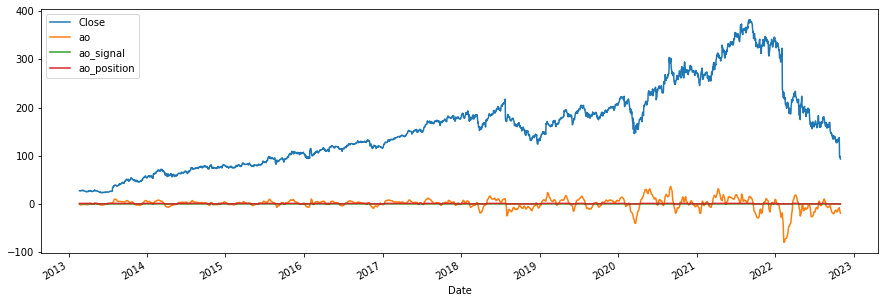

In [191]:
strategy.plot(figsize=(15,5))

# Testing on Ichimoku Strategy

Post building the trading strategy,
Implementing those on the financial data will provide the insight on the performance of strategies.

In [138]:
bt_df = df[(df.index >= '2019-01-01') & (df.index <= '2022-11-01')]
bt_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-25,130.880005,138.350006,130.589996,137.509995,137.509995,38433200
2022-10-26,131.679993,135.550003,128.529999,129.820007,129.820007,82791500
2022-10-27,97.980003,102.500000,96.379997,97.940002,97.940002,232316600
2022-10-28,99.580002,100.849998,97.510002,99.199997,99.199997,95928300
2022-10-31,98.220001,99.320000,92.599998,93.160004,93.160004,121361400


In [139]:
def prepare_stock_ta_backtest_data(df, start_date, end_date, strategy, **strategy_params):
  df_strategy = strategy(df, **strategy_params)
  bt_df = df_strategy[(df_strategy.index >= start_date) & (df_strategy.index <= end_date)]
  return bt_df

In [140]:
start_date = '2019-01-01'
end_date = '2022-11-01'
bt_df = prepare_stock_ta_backtest_data(
    df, start_date, end_date, strategy_Ichmoku, n_conv = 9, n_base = 26, n_span_b = 52
    )

bt_df.head()

,Open,High,Low,Close,Adj Close,Volume,BASE,CONV,DIFF,DIFF_PREV,LONG,EXIT_LONG,SHORT,EXIT_SHORT
Date,,,,,,,,,,,,,,
2019-01-02,128.990005,137.509995,128.559998,135.679993,135.679993,28146200,135.105,133.965,-1.140,-0.630,False,False,False,False
2019-01-03,134.690002,137.169998,131.119995,131.740005,131.740005,22717900,135.105,130.265,-4.840,-1.140,False,False,False,False
2019-01-04,134.009995,138.000000,133.750000,137.949997,137.949997,29002100,135.105,130.510,-4.595,-4.840,False,False,False,False
2019-01-07,137.559998,138.869995,135.910004,138.050003,138.050003,20089300,135.105,130.945,-4.160,-4.595,False,False,False,False
2019-01-08,139.889999,143.139999,139.539993,142.529999,142.529999,26263800,135.105,134.515,-0.590,-4.160,False,False,False,False


One integrated function for simulate test on the investment of 1000000

In [141]:
def run_stock_ta_backtest(bt_df, stop_loss_lvl=None):
  balance = 1000000
  pnl = 0
  position = 0

  last_signal = 'hold'
  last_price = 0
  c = 0

  trade_date_start = []
  trade_date_end = []
  trade_days = []
  trade_side = []
  trade_pnl = []
  trade_ret = []

  cum_value = []

  for index, row in bt_df.iterrows():
      # check and close any positions
      if row.EXIT_LONG and last_signal == 'long':
        trade_date_end.append(row.name)
        trade_days.append(c)

        pnl = (row.Open - last_price) * position
        trade_pnl.append(pnl)
        trade_ret.append((row.Open / last_price - 1) * 100)
        
        balance = balance + row.Open * position
        
        position = 0
        last_signal = 'hold'

        c = 0
      
      elif row.EXIT_SHORT and last_signal == 'short':
        trade_date_end.append(row.name)
        trade_days.append(c)
        
        pnl = (row.Open - last_price) * position
        trade_pnl.append(pnl)
        trade_ret.append((last_price / row.Open - 1) * 100)

        balance = balance + pnl

        position = 0
        last_signal = 'hold'

        c = 0


      # check signal and enter any possible position
      if row.LONG and last_signal != 'long':
        last_signal = 'long'
        last_price = row.Open
        trade_date_start.append(row.name)
        trade_side.append('long')

        position = int(balance / row.Open)
        cost = position * row.Open
        balance = balance - cost

        c = 0

      elif row.SHORT and last_signal != 'short':
        last_signal = 'short'
        last_price = row.Open
        trade_date_start.append(row.name)
        trade_side.append('short')

        position = int(balance / row.Open) * -1
        
        c = 0
      
      if stop_loss_lvl:
        # check stop loss
        if last_signal == 'long' and (row.Low / last_price - 1) * 100 <= stop_loss_lvl:
          c = c + 1

          trade_date_end.append(row.name)
          trade_days.append(c)

          stop_loss_price = last_price + round(last_price * (stop_loss_lvl / 100), 4)

          pnl = (stop_loss_price - last_price) * position
          trade_pnl.append(pnl)
          trade_ret.append((stop_loss_price / last_price - 1) * 100)
          
          balance = balance + stop_loss_price * position
          
          position = 0
          last_signal = 'hold'

          c = 0

        elif last_signal == 'short' and (last_price / row.Low - 1) * 100 <= stop_loss_lvl:
          c = c + 1

          trade_date_end.append(row.name)
          trade_days.append(c)
          
          stop_loss_price = last_price - round(last_price * (stop_loss_lvl / 100), 4)

          pnl = (stop_loss_price - last_price) * position
          trade_pnl.append(pnl)
          trade_ret.append((last_price / stop_loss_price - 1) * 100)

          balance = balance + pnl

          position = 0
          last_signal = 'hold'

          c = 0

    
      # compute market value and count days for any possible poisition
      if last_signal == 'hold':
        market_value = balance
      elif last_signal == 'long':
        c = c + 1
        market_value = position * row.Close + balance
      else: 
        c = c + 1
        market_value = (row.Close - last_price) * position + balance
      
      cum_value.append(market_value)


  # generate analysis
  # performance over time
  cum_ret_df = pd.DataFrame(cum_value, index=bt_df.index, columns=['CUM_RET'])
  cum_ret_df['CUM_RET'] = (cum_ret_df.CUM_RET / 1000000 - 1) * 100
  cum_ret_df['BUY_HOLD'] = (bt_df.Close / bt_df.Open.iloc[0] - 1) * 100
  cum_ret_df['ZERO'] = 0

  # trade stats
  size = min(len(trade_date_start), len(trade_date_end))

  tarde_dict = {
      'START': trade_date_start[:size],
      'END': trade_date_end[:size],
      'SIDE': trade_side[:size],
      'DAYS': trade_days[:size],
      'PNL': trade_pnl[:size],
      'RET': trade_ret[:size]
  }

  trade_df = pd.DataFrame(tarde_dict)

  num_trades = trade_df.groupby('SIDE').count()[['START']]
  num_trades_win = trade_df[trade_df.PNL > 0].groupby('SIDE').count()[['START']]

  avg_days = trade_df.groupby('SIDE').mean()[['DAYS']]

  avg_ret = trade_df.groupby('SIDE').mean()[['RET']]
  avg_ret_win = trade_df[trade_df.PNL > 0].groupby('SIDE').mean()[['RET']]
  avg_ret_loss = trade_df[trade_df.PNL < 0].groupby('SIDE').mean()[['RET']]

  std_ret = trade_df.groupby('SIDE').std()[['RET']]

  detail_df = pd.concat([
                        num_trades, num_trades_win, avg_days,
                        avg_ret, avg_ret_win, avg_ret_loss, std_ret
                        ], axis=1, sort=False)

  detail_df.columns = [
                      'NUM_TRADES', 'NUM_TRADES_WIN', 'AVG_DAYS', 
                      'AVG_RET', 'AVG_RET_WIN', 'AVG_RET_LOSS', 'STD_RET'
                      ]

  detail_df.round(2)

  # max drawdown
  mv_df = pd.DataFrame(cum_value, index=bt_df.index, columns=['MV'])

  days = len(mv_df)

  roll_max = mv_df.MV.rolling(window=days, min_periods=1).max()
  drawdown_val = mv_df.MV - roll_max
  drawdown_pct = (mv_df.MV / roll_max - 1) * 100

  # return all stats
  return {
      'cum_ret_df': cum_ret_df,
      'max_drawdown': {
          'value': round(drawdown_val.min(), 0), 
          'pct': round(drawdown_pct.min(), 2)
          },
      'trade_stats': detail_df
  }

In [142]:
result = run_stock_ta_backtest(bt_df)

Max Drawdown: -39.39 %


,NUM_TRADES,NUM_TRADES_WIN,AVG_DAYS,AVG_RET,AVG_RET_WIN,AVG_RET_LOSS,STD_RET
SIDE,,,,,,,
long,21,8,27.619048,1.904087,12.955423,-4.896734,12.936872
short,20,6,16.800000,1.383463,14.707268,-4.326739,13.156544


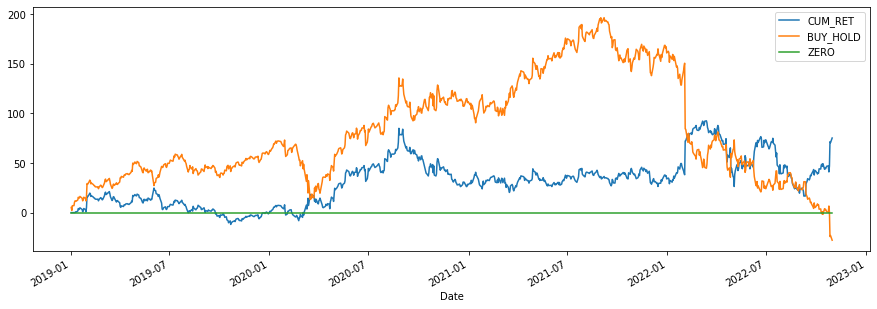

In [143]:
result['cum_ret_df'].plot(figsize=(15, 5))

print('Max Drawdown:', result['max_drawdown']['pct'], '%')

result['trade_stats']

After implementing above all strategies, 
I Found that Ichimoku strategy is outperforming among all.
Althogh the Ichimoku is performing well, there's huge opportunity to explore the strategies with differnet parameter which may perform better than the current scenario.
To get better combination of parameters for a improvement in the result, Let's explore these strategies with some ranges of paramater for each strategies.


# Test Multiple Strategies

In [144]:
from itertools import product
strategies = [
  {
    'func': strategy_KeltnerChannel_origin,
    'param': {
      'n': [i for i in range(10, 35, 5)]
    }
  },

  {
    'func': strategy_BollingerBands,
    'param': {
      'n': [i for i in range(10, 35, 5)],
      'n_rng': [1, 2]
    }
  },

  {
    'func': strategy_MA,
    'param': {
      'n': [i for i in range(10, 110, 10)],
      'ma_type': ['sma', 'ema']
    }
  },

  {
    'func': strategy_MACD,
    'param': {
      'n_slow': [i for i in range(10, 16)],
      'n_fast': [i for i in range(20, 26)],
      'n_sign': [i for i in range(5, 11)]
    }
  },

  {
    'func': strategy_RSI,
    'param': {
      'n': [i for i in range(5, 21)]
    }
  },

  {
    'func': strategy_WR,
    'param': {
      'n': [i for i in range(5, 21)]
    }
  },

  {
    'func': strategy_Stochastic_fast,
    'param': {
      'k': [i for i in range(15, 26)],
      'd': [i for i in range(5, 11)]
    }
  },

  {
    'func': strategy_Stochastic_slow,
    'param': {
      'k': [i for i in range(15, 26)],
      'd': [i for i in range(5, 11)],
      'dd': [i for i in range(1, 6)]
    }
  },

  {
    'func': strategy_Ichmoku,
    'param': {
      'n_conv': [i for i in range(5, 16)],
      'n_base': [i for i in range(20, 36)],
      'n_span_b': [26]
    }
  },
]

In [145]:
for s in strategies:
  func = s['func']
  param = s['param']

  param_name = []
  param_list = []

  for k in param:
    param_name.append(k)
    param_list.append(param[k])

  param_dict_list = [dict(zip(param_name, param)) for param in list(product(*param_list))]
  
  print(len(param_dict_list))

5
10
20
216
16
16
66
330
176


Pick the best strategy out of all

In [146]:
def pick_top_strategy(ticker, start_date, end_date, strategies):
  df = get_stock_backtest_data(ticker, start_date, end_date)

  stop_loss_lvl = [-i for i in range(2, 6, 1)]
  stop_loss_lvl.append(None)

  result_dict = {
      'strategy': [],
      'param': [],
      'stoploss': [],
      'return': [],
      'max_drawdown': []
  }

  for s in strategies:
    func = s['func']
    param = s['param']

    strategy_name = str(func).split(' ')[1]

    param_name = []
    param_list = []

    for k in param:
      param_name.append(k)
      param_list.append(param[k])

    param_dict_list = [dict(zip(param_name, param)) for param in list(product(*param_list))]
    total_param_dict = len(param_dict_list)

    c = 0

    for param_dict in param_dict_list:
      clear_output()
      c = c + 1
      print('Running backtest for {} - ({}/{})'.format(strategy_name, c, total_param_dict))

      for l in stop_loss_lvl:
        bt_df = prepare_stock_ta_backtest_data(
            df, start_date, end_date, 
            func, **param_dict)

        result = run_stock_ta_backtest(bt_df, stop_loss_lvl=l)

        result_dict['strategy'].append(strategy_name)
        result_dict['param'].append(str(param_dict))
        result_dict['stoploss'].append(l)
        result_dict['return'].append(result['cum_ret_df'].iloc[-1, 0])
        result_dict['max_drawdown'].append(result['max_drawdown']['pct'])

  clear_output()

  df = pd.DataFrame(result_dict)
  df = df[df['return'] > 0]
  top_df = df.sort_values(['return', 'max_drawdown'], ascending=[False, False]).head(1).iloc[0]

  if len(top_df):
    return {
        'strategy': eval(top_df['strategy']), 
        'param': eval(top_df['param']), 
        'stoploss': top_df['stoploss']
    }
  else:
    return None


#top_strategy = pick_top_strategy(ticker, start_date, end_date, strategies)

In [147]:
def execute_strategy(ticker, start_date, end_date, strategy, strategy_param, stop_loss):
  df = get_stock_backtest_data(ticker, start_date, end_date)

  bt_df = prepare_stock_ta_backtest_data(
      df, start_date, end_date, 
      strategy, **strategy_param)

  result = run_stock_ta_backtest(bt_df, stop_loss_lvl=l)

  return result


result = execute_strategy(
    ticker, start_date, end_date, 
    top_strategy['strategy'], top_strategy['param'], top_strategy['stoploss']
)

# result

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


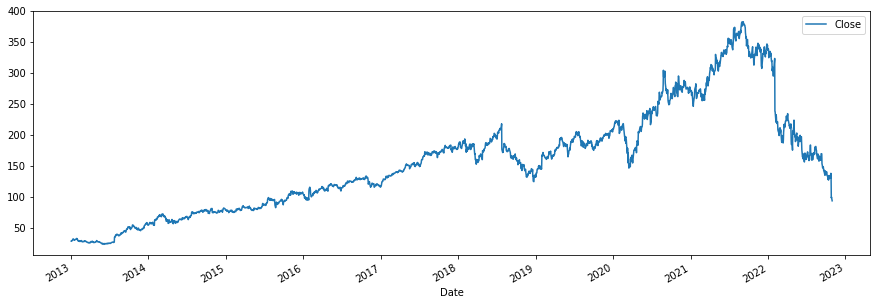

In [148]:
df = get_stock_backtest_data('META', '2019-01-01', '2022-11-01')
df[['Close']].plot(figsize=(15,5))

In [149]:
top_strategy = pick_top_strategy('META', '2019-01-01', '2022-11-01', strategies)
top_strategy

{'strategy': <function __main__.strategy_WR(df, **kwargs)>,
 'param': {'n': 8},
 'stoploss': -2.0}

[*********************100%***********************]  1 of 1 completed


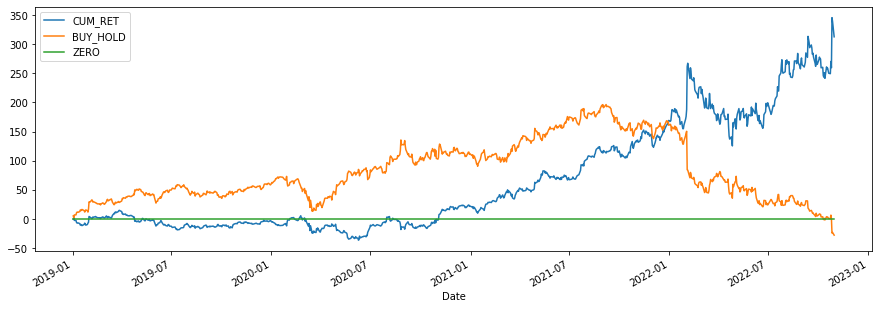

In [150]:
result = execute_strategy(
  'META', '2019-01-01', '2022-11-01', 
  top_strategy['strategy'], top_strategy['param'], top_strategy['stoploss']
)

result['cum_ret_df'].plot(figsize=(15,5))

In [151]:
result['trade_stats']

,NUM_TRADES,NUM_TRADES_WIN,AVG_DAYS,AVG_RET,AVG_RET_WIN,AVG_RET_LOSS,STD_RET
SIDE,,,,,,,
long,44,32,10.227273,2.010233,5.392968,-7.010394,7.124968
short,45,30,11.400000,2.806554,6.907712,-5.395762,9.583764


In [152]:
result

{'cum_ret_df':                CUM_RET   BUY_HOLD  ZERO
 Date                                   
 2019-01-02    0.000000   5.186438     0
 2019-01-03    2.190078   2.131948     0
 2019-01-04   -2.420220   6.946268     0
 2019-01-07   -2.494464   7.023798     0
 2019-01-08   -5.820413  10.496932     0
 ...                ...        ...   ...
 2022-10-25  270.275997   6.605154     0
 2022-10-26  259.585933   0.643462     0
 2022-10-27  345.429223 -24.071635     0
 2022-10-28  339.330269 -23.094819     0
 2022-10-31  312.580950 -27.777347     0
 
 [966 rows x 3 columns],
 'max_drawdown': {'value': -1418549.0, 'pct': -44.63},
 'trade_stats':        NUM_TRADES  NUM_TRADES_WIN   AVG_DAYS   AVG_RET  AVG_RET_WIN  \
 SIDE                                                                  
 long           44              32  10.227273  2.010233     5.392968   
 short          45              30  11.400000  2.806554     6.907712   
 
        AVG_RET_LOSS   STD_RET  
 SIDE                           


### Conclusion:

The best suited strategy among all the strategies with various combination of parameters is "**strategy_WR**" with parameter **n=8**.
Following this strategy would lead to higher returns as compares to others.